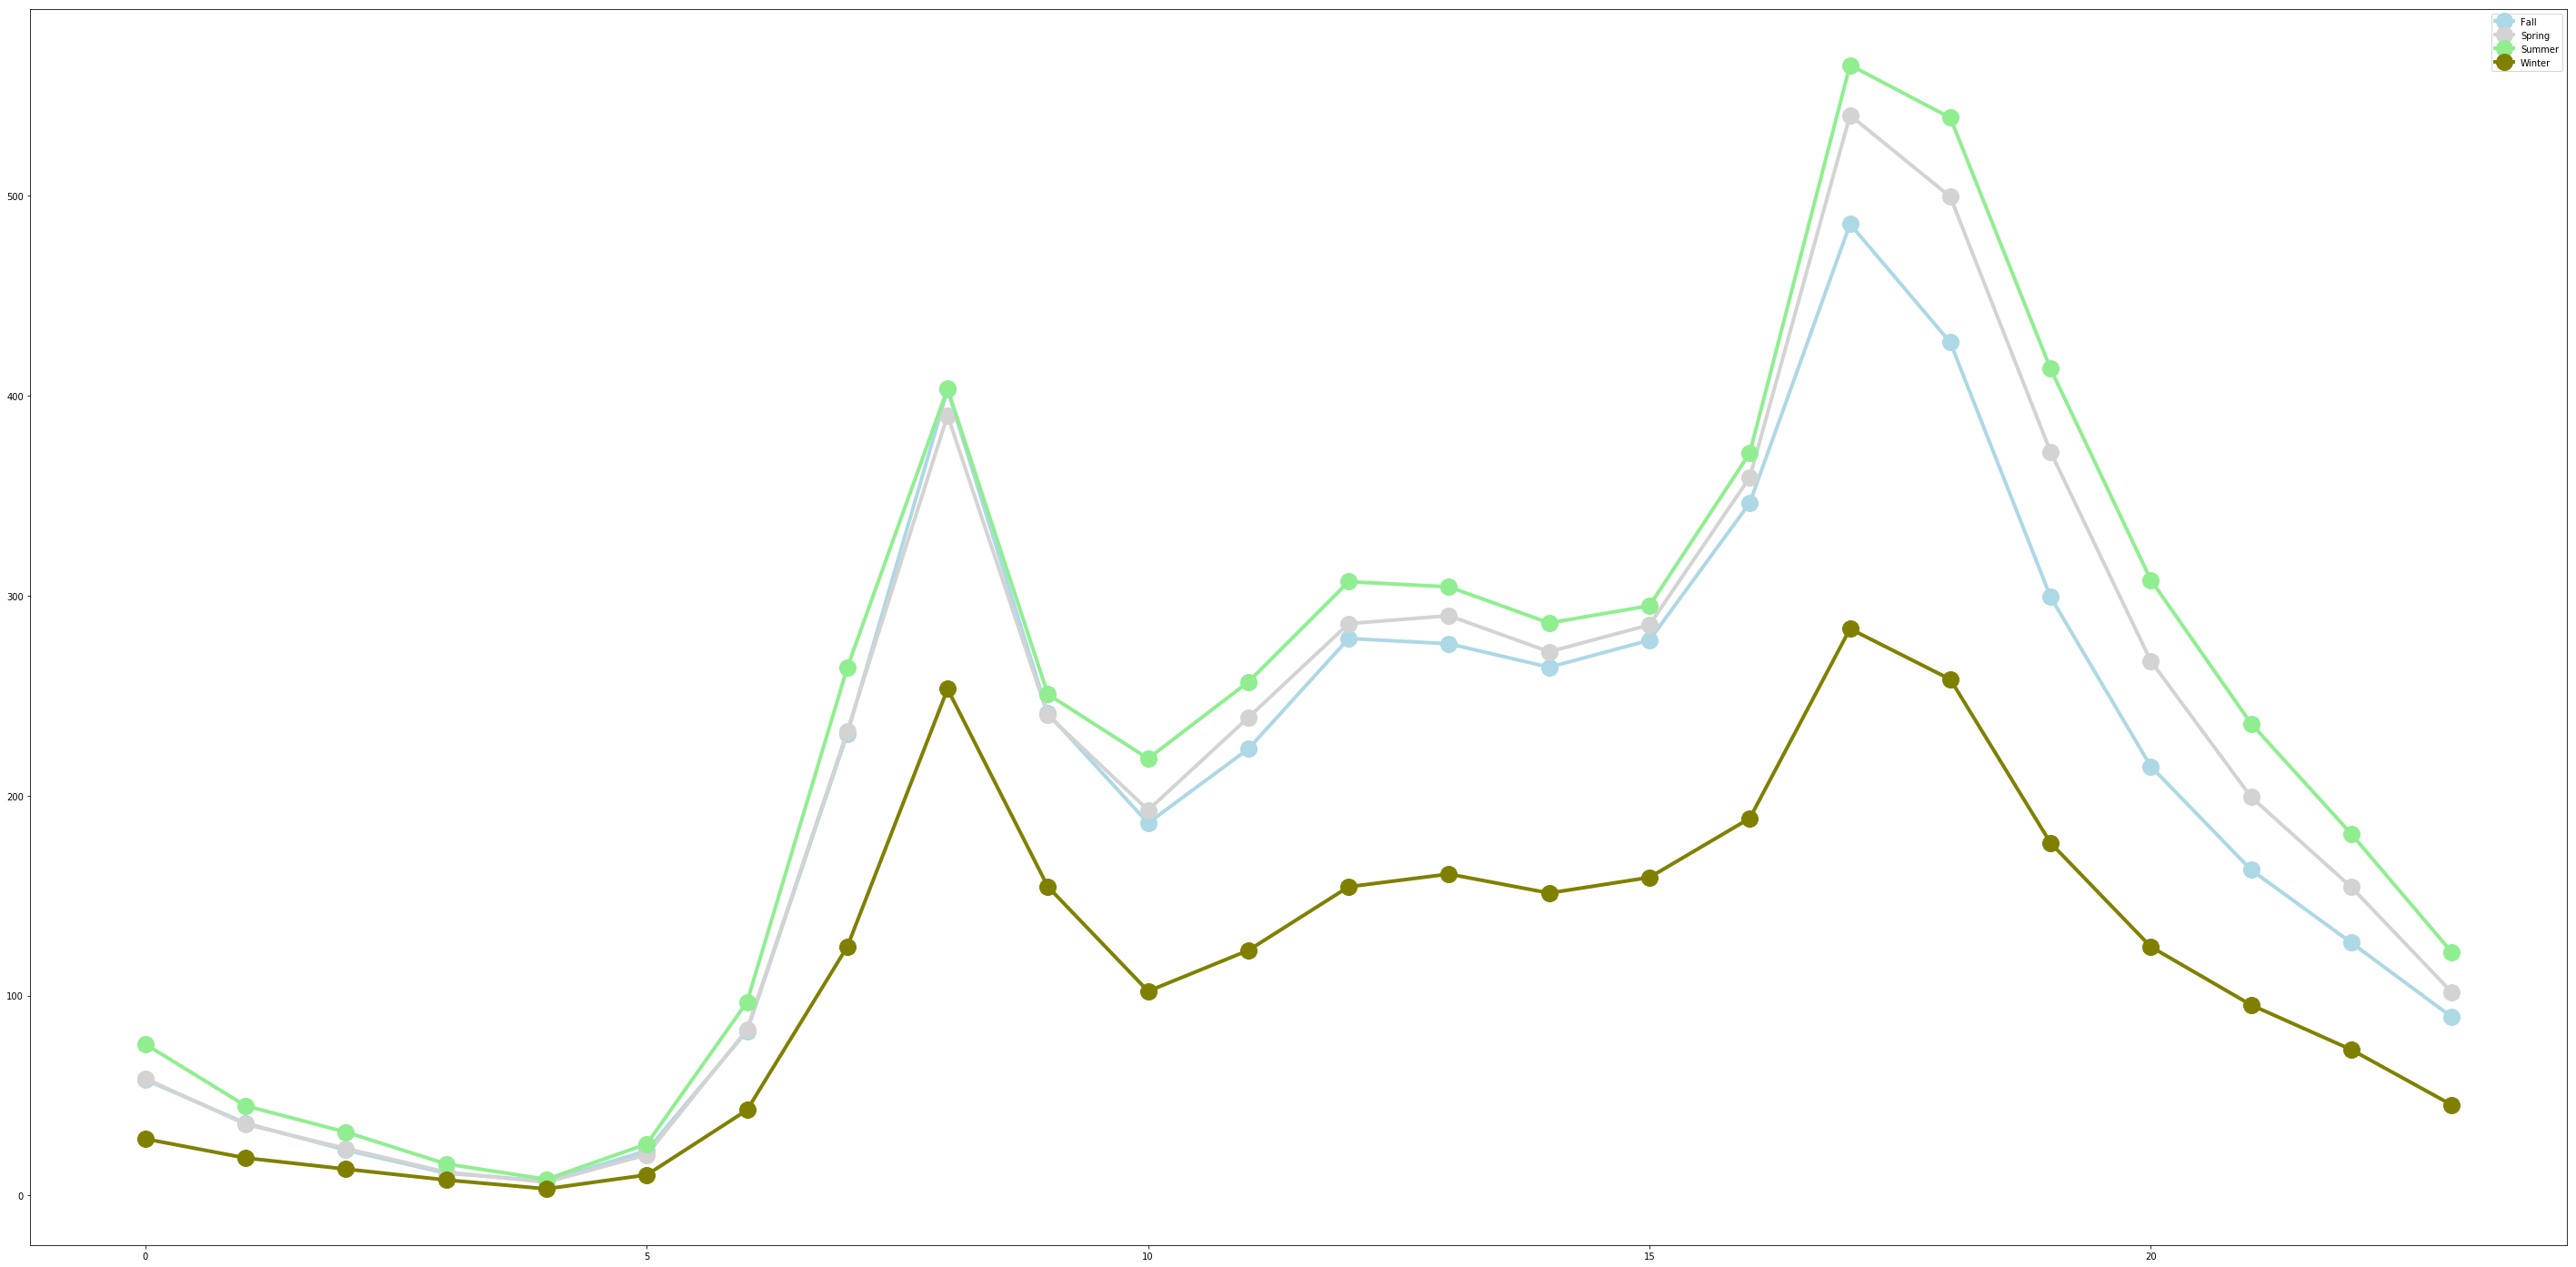

35.49230769230769
27.328125
36.246153846153845
37.47692307692308
53.234375
98.21212121212122
96.22727272727273
------------------------
18.076923076923077
11.904761904761905
15.615384615384615
15.415384615384616
24.453125
70.01515151515152
79.45454545454545
------------------------
10.666666666666666
6.203125
8.365079365079366
8.421875
12.53125
50.34848484848485
62.484375
------------------------
5.677966101694915
4.0344827586206895
5.0
4.868852459016393
6.32258064516129
23.060606060606062
30.393939393939394
------------------------
6.140625
5.241935483870968
4.629032258064516
5.301587301587301
5.932203389830509
7.666666666666667
9.651515151515152
------------------------
22.415384615384614
24.015625
25.046153846153846
25.50769230769231
23.375
8.515151515151516
9.476190476190476
------------------------
89.24615384615385
105.375
105.81538461538462
108.23076923076923
91.359375
21.12121212121212
15.136363636363637
------------------------
260.4
297.609375
297.24615384615385
307.692307692

In [204]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


def map_season(sid):
    if sid.strip() == '1':
        return 'Winter'
    elif sid.strip() == '2':
        return 'Spring'
    elif sid.strip() == '3':
        return 'Summer'
    elif sid.strip() == '4': 
        return 'Fall'
    
def tonumber(x):
    return int(x.strip())

def get_hourly_time(t):
    dt = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
    return dt.hour

def get_week_day(dte):
    dt = datetime.strptime(dte, '%Y-%m-%d %H:%M:%S')
    return str(dt.weekday())
    

df = pd.read_csv('train.csv', names=['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 
                                     'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'])
df['season_name'] = df['season'].apply(map_season)


df = df[1:]
df['rental_hours'] = df['datetime'].apply(get_hourly_time)
df['weekday'] = df['datetime'].apply(get_week_day)
df['count'] = df['count'].apply(tonumber)
df['rent_mean_by_season'] = df.groupby(['season_name', 'rental_hours'])['count'].transform('mean')


season_mean = dict()
for season in ['Fall', 'Winter', 'Spring', 'Summer']:
    season_df = df[df['season_name'] == season].head(24)
    season_mean.update({season: np.asarray(season_df.rent_mean_by_season)})
    

df2 = pd.DataFrame({'x': range(0, 24), 
                  'Fall': season_mean['Fall'], 
                  'Spring': season_mean['Spring'], 
                  'Summer': season_mean['Summer'], 
                  'Winter': season_mean['Winter']})

plt.rcParams["figure.figsize"] = (50,25)
plt.plot( 'x', 'Fall', data=df2, marker='o', markerfacecolor='lightblue', markersize=18, color='lightblue', linewidth=4)
plt.plot( 'x', 'Spring', data=df2, marker='o', markerfacecolor='lightgrey', markersize=18, color='lightgrey', linewidth=4)
plt.plot( 'x', 'Summer', data=df2, marker='o', markerfacecolor='lightgreen', markersize=18, color='lightgreen', linewidth=4)
plt.plot( 'x', 'Winter', data=df2, marker='o', markerfacecolor='olive', markersize=18, color='olive', linewidth=4)
plt.legend()
plt.show()

df['rent_mean_by_day'] = df.groupby(['weekday', 'rental_hours'])['count'].transform('mean')

df2 = df.groupby(['rental_hours', 'weekday']).rent_mean_by_day.apply(lambda x: x.iloc[-1])
day_dict = {'0': 'Monday',
            '1': 'Tuesday',
            '2': 'Wednesday',
            '3': 'Thursday',
            '4': 'Friday',
            '5': 'Saturday',
            '6': 'Sunday'
           }

Matrix = {}

for x in range(0, 24):
    hour_means = [[]]
    for key, value in day_dict.items():
        print(df2[x][key])
        hour_means.append()
    print('------------------------')










    
